## Compare different methods for loading wav files

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.io import wavfile

# PCM encoded 16 bits per sample, sampling rate 44100 Hertz, stereo
filename = 'a2002011001-e02.wav'

## Read wavfile

In [ ]:
sample_rate, audio = wavfile.read(filename)
n_samples = audio.shape[0]
print(audio.dtype)

## Plot waveform

In [ ]:
duration = sample_rate*n_samples
x = np.linspace(0, duration, n_samples)
audio = audio/32768.0

plt.subplot(211)
plt.plot(x, audio[:,0])
plt.subplot(212)
plt.plot(x, audio[:,1])
plt.show()

## Load wavfile function

In [ ]:
def load_audio_from_wav(filename, bitrate=16, twos_comp=True):
    # read audio
    sample_rate, audio = wavfile.read(filename)
    assert(audio.dtype=='int16') # assume audio is int16 for now
    
    # combine channels
    audio = np.mean(np.array(audio), 1)
    
    # normalize to [-1, 1]
    max_code = 2**bitrate
    norm_factor = max_code/2.0
    offset = (not twos_comp)*max_code
    normed_audio = (audio - offset)/norm_factor
    
    return normed_audio, sample_rate

In [ ]:
func_audio, _ = load_audio_from_wav(filename)
x = np.linspace(0, duration, n_samples)

plt.subplot(211)
plt.plot(x, np.mean(audio, 1))
plt.subplot(212)
plt.plot(x, func_audio)

## Randomly split into input and output segments

In [ ]:
def split_audio_into_segments(audio, n_x, n_y, n_segments):
    n_samples = audio.shape[0]
    n_points = n_x + n_y
    
    #   select random index from range(0, n_samples - n_points)
    start_idxs = np.random.randint(0, n_samples - n_points, n_segments)
    
    # iterate to create lists of segments
    x = []
    y = []
    for idx in start_idxs:
        x.append(audio[idx:idx+n_x])
        y.append(audio[idx+n_x:idx+n_x+n_y])
    
    return x, y

func_audio, _ = load_audio_from_wav(filename)
train_x, train_y = split_audio_into_segments(func_audio, 50, 10, 5)
print(len(train_x))
print(len(train_y))
print(train_x[0].shape)
print(train_y[0].shape)

## Test MusicRnnData Class

In [1]:
from MusicRnnData import MusicRnnData

batch_size = 100
x_len = 50
y_len = 10

filenames = ['a2002011001-e02.wav']

music_data = MusicRnnData(filenames)
x_samples, y_samples = music_data.data_batch(x_len, y_len, batch_size)
print(x_samples.shape)
print(y_samples.shape)

(100, 50)
(100, 10)


## Test convert_to_wav method

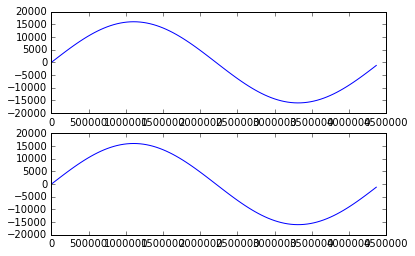

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.io import wavfile

from MusicRnnData import MusicRnnData

filenames = ['sine.wav']
music_data = MusicRnnData(filenames)

sample_rate, original = wavfile.read(filenames[0])
converted = music_data.convert_to_wav(music_data.tracks[0])

n_samples = original.shape[0]
duration = sample_rate*n_samples
x = np.linspace(0, duration, n_samples)

plt.subplot(211)
plt.plot(x[0:100], original[0:100])
plt.subplot(212)
plt.plot(x[0:100], converted[0:100])